<center>
  <h1 style="background-color:black; color:yellow; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;"> Bollywood Movie Rating Prediction</h1>
</center>

# Importing Libraries

In [128]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations
import missingno


# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [5]:
# Specify the Kaggle dataset path (replace with the actual path)
kaggle_dataset_path = ('/kaggle/input/imdb-india-movies/IMDb Movies India.csv')

# Read the CSV file
d = pd.read_csv(kaggle_dataset_path, encoding='ISO-8859-1')

In [6]:
d.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [7]:
d.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


# Exploring Data

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
d.size

155090

In [11]:
d.shape

(15509, 10)

In [12]:
d.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [13]:
d.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [14]:
d['Genre'].nunique()

485

In [16]:
d['Genre'].head(10)

0                        Drama
1                        Drama
2               Drama, Musical
3              Comedy, Romance
4                        Drama
5       Comedy, Drama, Musical
6          Drama, Romance, War
7                  Documentary
8    Horror, Mystery, Thriller
9      Action, Crime, Thriller
Name: Genre, dtype: object

In [19]:
d.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [22]:
d[(d[ 'Rating' ] == d[ 'Rating' ].max())]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [23]:
d[(d[ 'Rating' ] == d[ 'Rating' ].min())]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [24]:
d.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [29]:
d.Year.nunique()

102

In [30]:
d[d.Rating <=5].describe()

,Rating
count,2205.000000
mean,4.068889
std,0.741970
min,1.100000
25%,3.600000
50%,4.200000
75%,4.700000
max,5.000000


In [31]:
d[d['Rating'] <= 5].groupby('Rating').count()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,,,,,,,,,
1.1,1,1,1,1,1,1,1,1,1
1.4,1,1,1,1,1,1,1,1,1
1.6,3,3,2,3,3,3,3,3,3
1.7,5,5,5,5,5,5,5,5,5
1.8,4,4,4,4,4,4,4,4,4
1.9,6,6,5,6,6,6,6,6,6
2.0,4,4,3,4,4,4,4,4,3
2.1,8,8,6,8,8,8,8,8,8
2.2,5,5,4,5,5,5,5,5,5


# Visualization of Data

In [32]:
# Convert the 'Year' column to string type
d['Year'] = d['Year'].astype(str)
# Extract numeric part of the string
d['Year'] = d['Year'].str.extract('(\d+)')
# Convert to numeric, handling non-finite values
d['Year'] = pd.to_numeric(d['Year'], errors='coerce')
# Replace non-finite values (NaN, inf) with a default value
default_year = 1900  # Replace with your desired default year
d['Year'] = d['Year'].replace([np.nan, np.inf, -np.inf], default_year)
# Convert to integers
d['Year'] = d['Year'].astype(int)

In [33]:
# Convert to numeric
d['Duration'] = pd.to_numeric(d['Duration'].str.strip(' min'))

In [34]:
d["Votes"]=d["Votes"].replace("$5.16M", 516)
# Convert to numeric
d["Votes"] = pd.to_numeric(d['Votes'].str.replace(',',''))

In [35]:
d['Name'] = d['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [37]:
# Assuming d is your DataFrame
Actor1 = d['Actor 1']
Actor2 = d['Actor 2']
Actor3 = d['Actor 3']
# Concatenating the series into one series
Actors = pd.concat([Actor1, Actor2, Actor3])

In [44]:
def Histogram(column):
    global d
    # Create a histogram using plotly.graph_objects
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=d[column], marker_color='yellow', marker_line_color='red', marker_line_width=.5))

    fig.update_layout(title=f'Histogram of {column}',
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      template='plotly_dark')

    fig.show()

In [47]:
Histogram('Rating')
Histogram('Year')
Histogram('Duration')

In [52]:
figg = px.histogram(data_frame=d, x='Genre', title='total number of Genre', color='Genre')

figg.show()

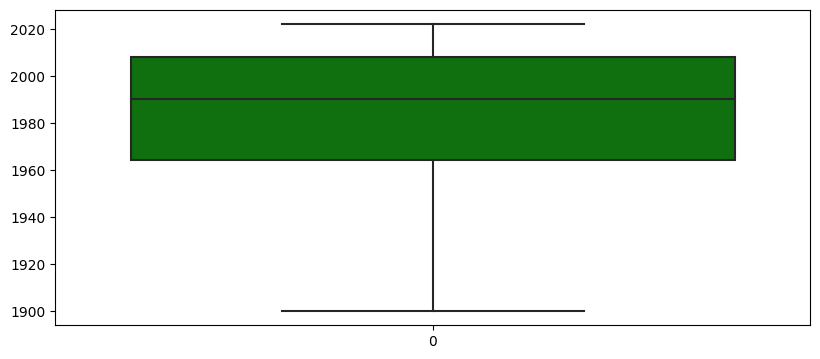

In [55]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,2)
sns.boxplot(d['Year'],color='green')

plt.tight_layout()
plt.show()

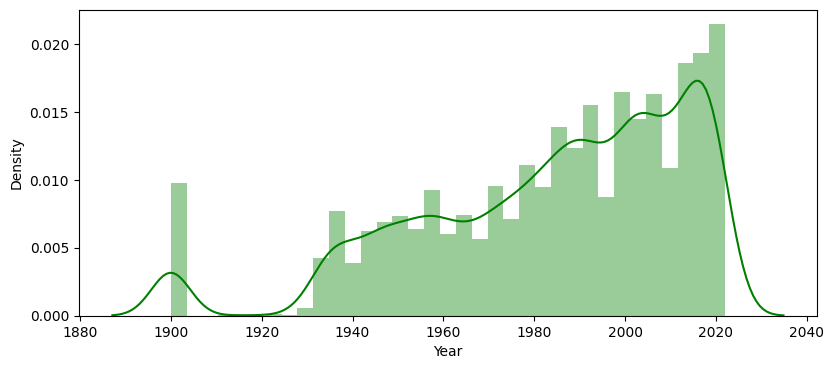

In [56]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(d['Year'],color='green')


plt.tight_layout()
plt.show()

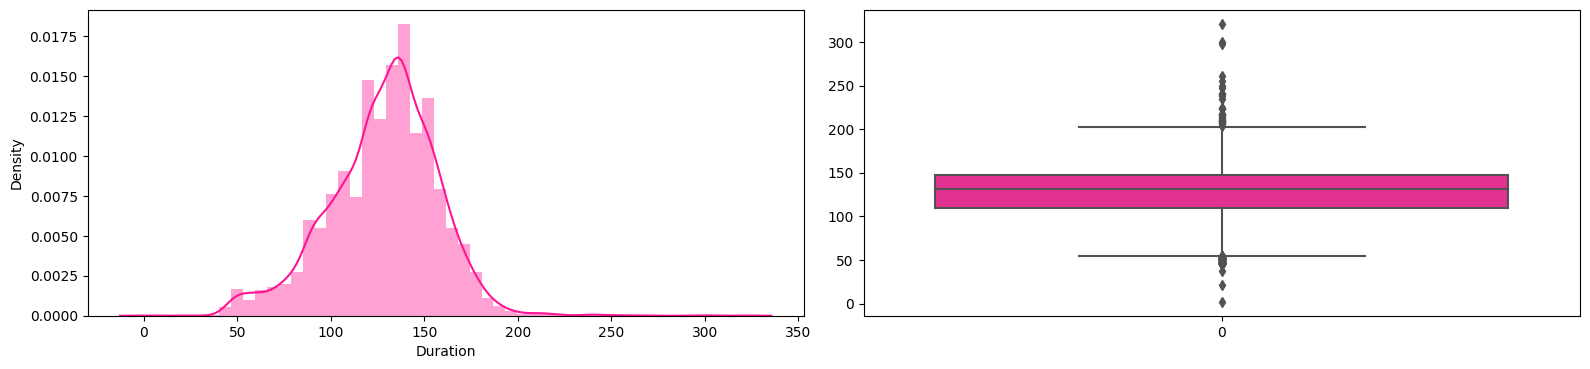

In [57]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(d['Duration'],color='DeepPink')

plt.subplot(2,2,2)
sns.boxplot(d['Duration'],color='DeepPink')

plt.tight_layout()
plt.show()

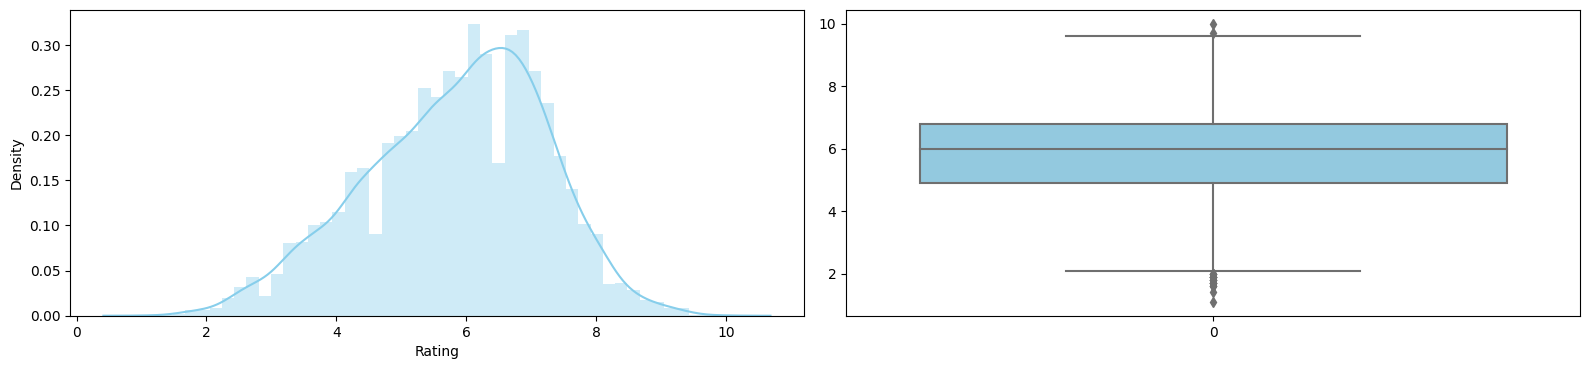

In [60]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(d['Rating'],color='skyblue')

plt.subplot(2,2,2)
sns.boxplot(d['Rating'],color='skyblue')

plt.tight_layout()
plt.show()

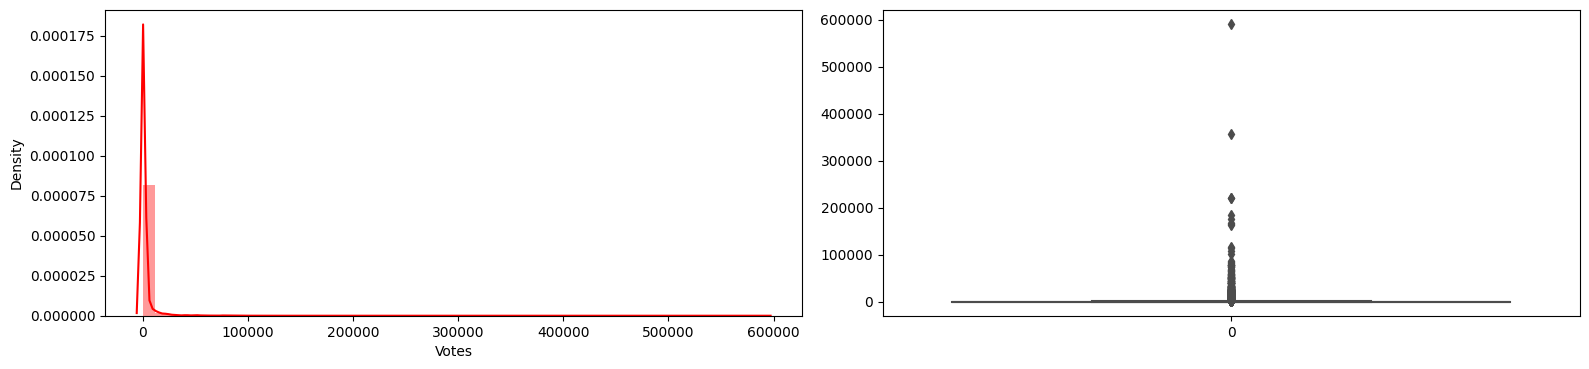

In [61]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(d['Votes'],color='red')

plt.subplot(2,2,2)
sns.boxplot(d['Votes'],color='red')

plt.tight_layout()
plt.show()

In [62]:
# Assuming 'd' is your DataFrame
df = d.loc[(d['Rating'] > 8) & (d['Votes'] > 10000), ['Rating', 'Votes', 'Name']]

fig = px.bar(df, x='Name', y='Votes', color='Rating', title='Movies with Rating greater than 8 and votes greater than 10000',
             labels={'Votes': 'Votes', 'Name': 'Movie Name'},
             width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=65, tickmode='array', tickvals=list(range(len(df['Name']))),
                             ticktext=df['Name']))

fig.show()

In [63]:
# Assuming 'd' is your DataFrame
df = d.loc[(d['Rating'] <= 5) & (d['Votes'] > 10000), ['Rating', 'Votes', 'Name']]

fig = px.bar(df, x='Name', y='Votes', color='Rating', title='Movies with Rating smaller than equal 5 and votes greater than 10000',
             labels={'Votes': 'Votes', 'Name': 'Movie Name'},
             width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=30, tickmode='array', tickvals=list(range(len(df['Name']))),
                             ticktext=df['Name']))

fig.show()

In [64]:
# Assuming 'df' is your DataFrame
top5_rating = d[['Year', 'Rating']].sort_values(by='Rating', ascending=False).head()

# Create a bar chart using Plotly Express
fig = px.bar(top5_rating, x='Year', y='Rating',
             color='Year', text='Rating',
             labels={'Year': 'Year', 'Rating': 'Rating'},
             title='Overall Top 5 Ratings',
             color_discrete_map={'Year': 'purple'})

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.update_layout(xaxis=dict(tickangle=0))

# Customize layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rating",
    title_font=dict(size=20, family="Arial, sans-serif", color="RebeccaPurple"),
    font=dict(family="Arial, sans-serif", size=15, color="Black"),
    legend=dict(title=dict(text='', font=dict(size=10)))
)

fig.show()


In [65]:
# Assuming 'df' is your DataFrame
top5_rating = d[['Year', 'Rating']].sort_values(by='Rating', ascending=False).head()

# Create a bar chart using Plotly.graph_objects
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=top5_rating['Year'],
    y=top5_rating['Rating'],
    marker=dict(color='purple')
))

# Add annotations for each bar
for index, row in top5_rating.iterrows():
    fig.add_annotation(
        x=row['Year'],
        y=row['Rating'],
        text=f'{row["Rating"]:.1f}',
        showarrow=True,
        arrowhead=4,
        arrowcolor='black',
        font=dict(size=12),
        xanchor='center',
        yanchor='bottom'
    )

# Customize layout
fig.update_layout(
    title='Overall Top 5 Ratings',
    xaxis_title='Year',
    yaxis_title='Rating',
    xaxis=dict(tickmode='array', tickvals=top5_rating['Year'], ticktext=top5_rating['Year']),
    font=dict(size=15, color='black'),
    showlegend=False
)

# Show the plot
fig.show()

In [67]:
def bestTenPlot(column):
    global d

    # Get the top 10 values and their counts
    top_values = d[column].value_counts().sort_values(ascending=False)[:10]

    # Create a DataFrame for Plotly Express
    data = {'Values': top_values.index, 'Count': top_values.values}
    
    # Create a bar chart using Plotly Express
    fig = px.bar(data, x='Values', y='Count', text='Count',
                 title=f'best Ten {column}',
                 labels={'Values': column, 'Count': 'Count'},
                 template='plotly_dark')

    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

    fig.update_layout(xaxis=dict(tickangle=55, tickmode='linear'))

    fig.show()

In [68]:
bestTenPlot("Director")

In [69]:
bestTenPlot("Actor 1")

In [132]:
# Sorting series by counts then selecting top 10
frequent_actor = Actors.value_counts().sort_values(ascending=False).head(10)

# Creating a DataFrame for Plotly Express
data = {'Actor': frequent_actor.index, 'Count': frequent_actor.values}
fig = px.bar(data, x='Count', y='Actor', orientation='h', color='Count',
             labels={'Count': 'Count', 'Actor': 'Actor'},
             title='Top 10 Actors', template='plotly_dark')

fig.update_layout(font=dict(family="Arial, sans-serif", size=12, color="yellow"))

fig.show()

In [71]:
bestTenPlot("Genre")

In [74]:
def Scatterplot(x, y, c=None):
    global d
    
    plt.figure(figsize=(20,20))
    plt.scatter(d[x], d[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()   


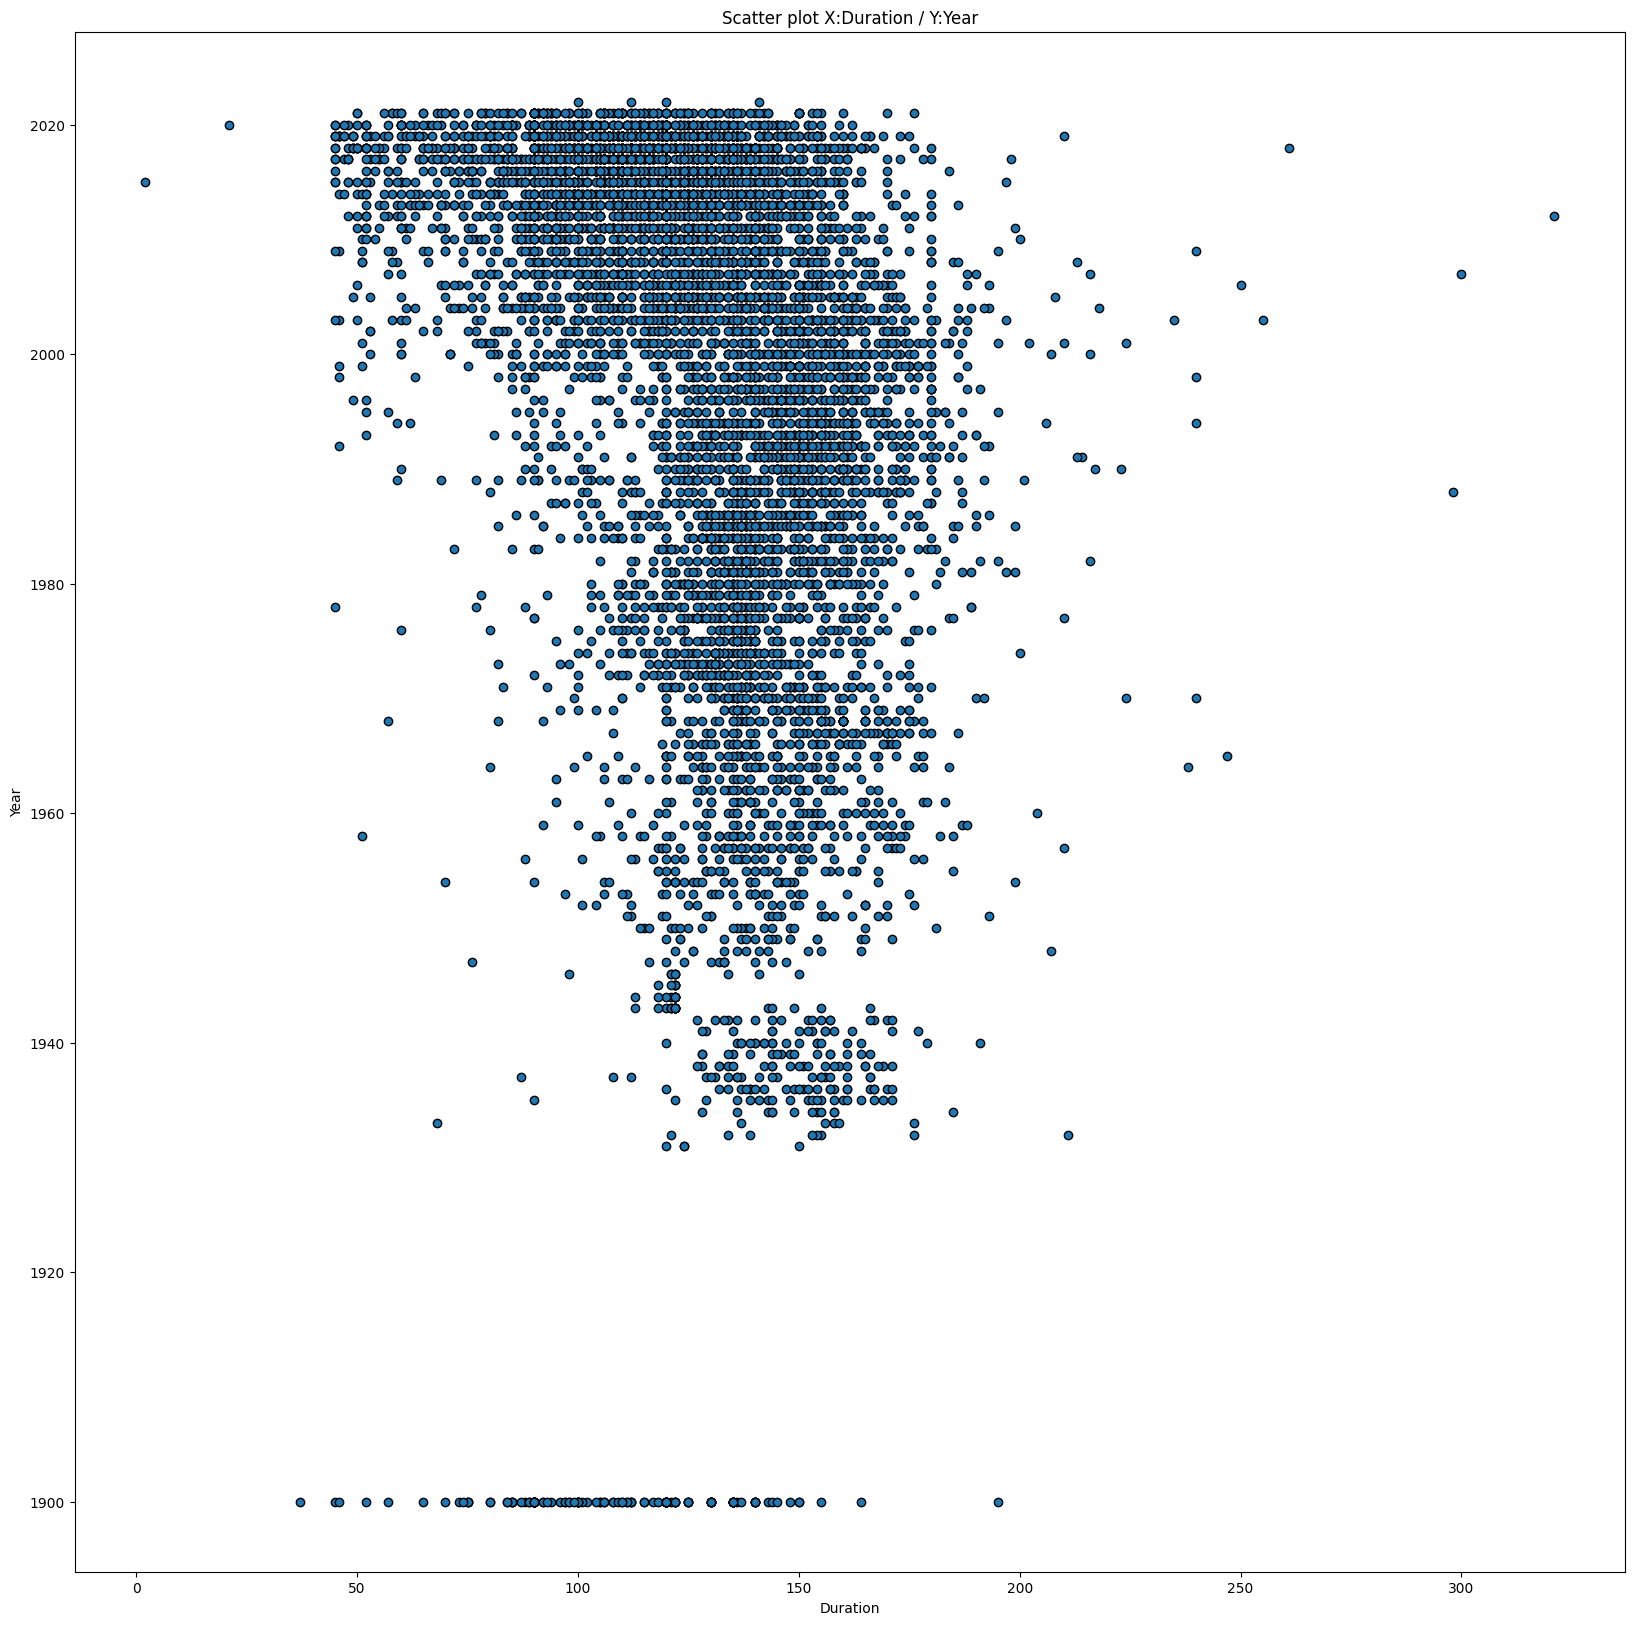

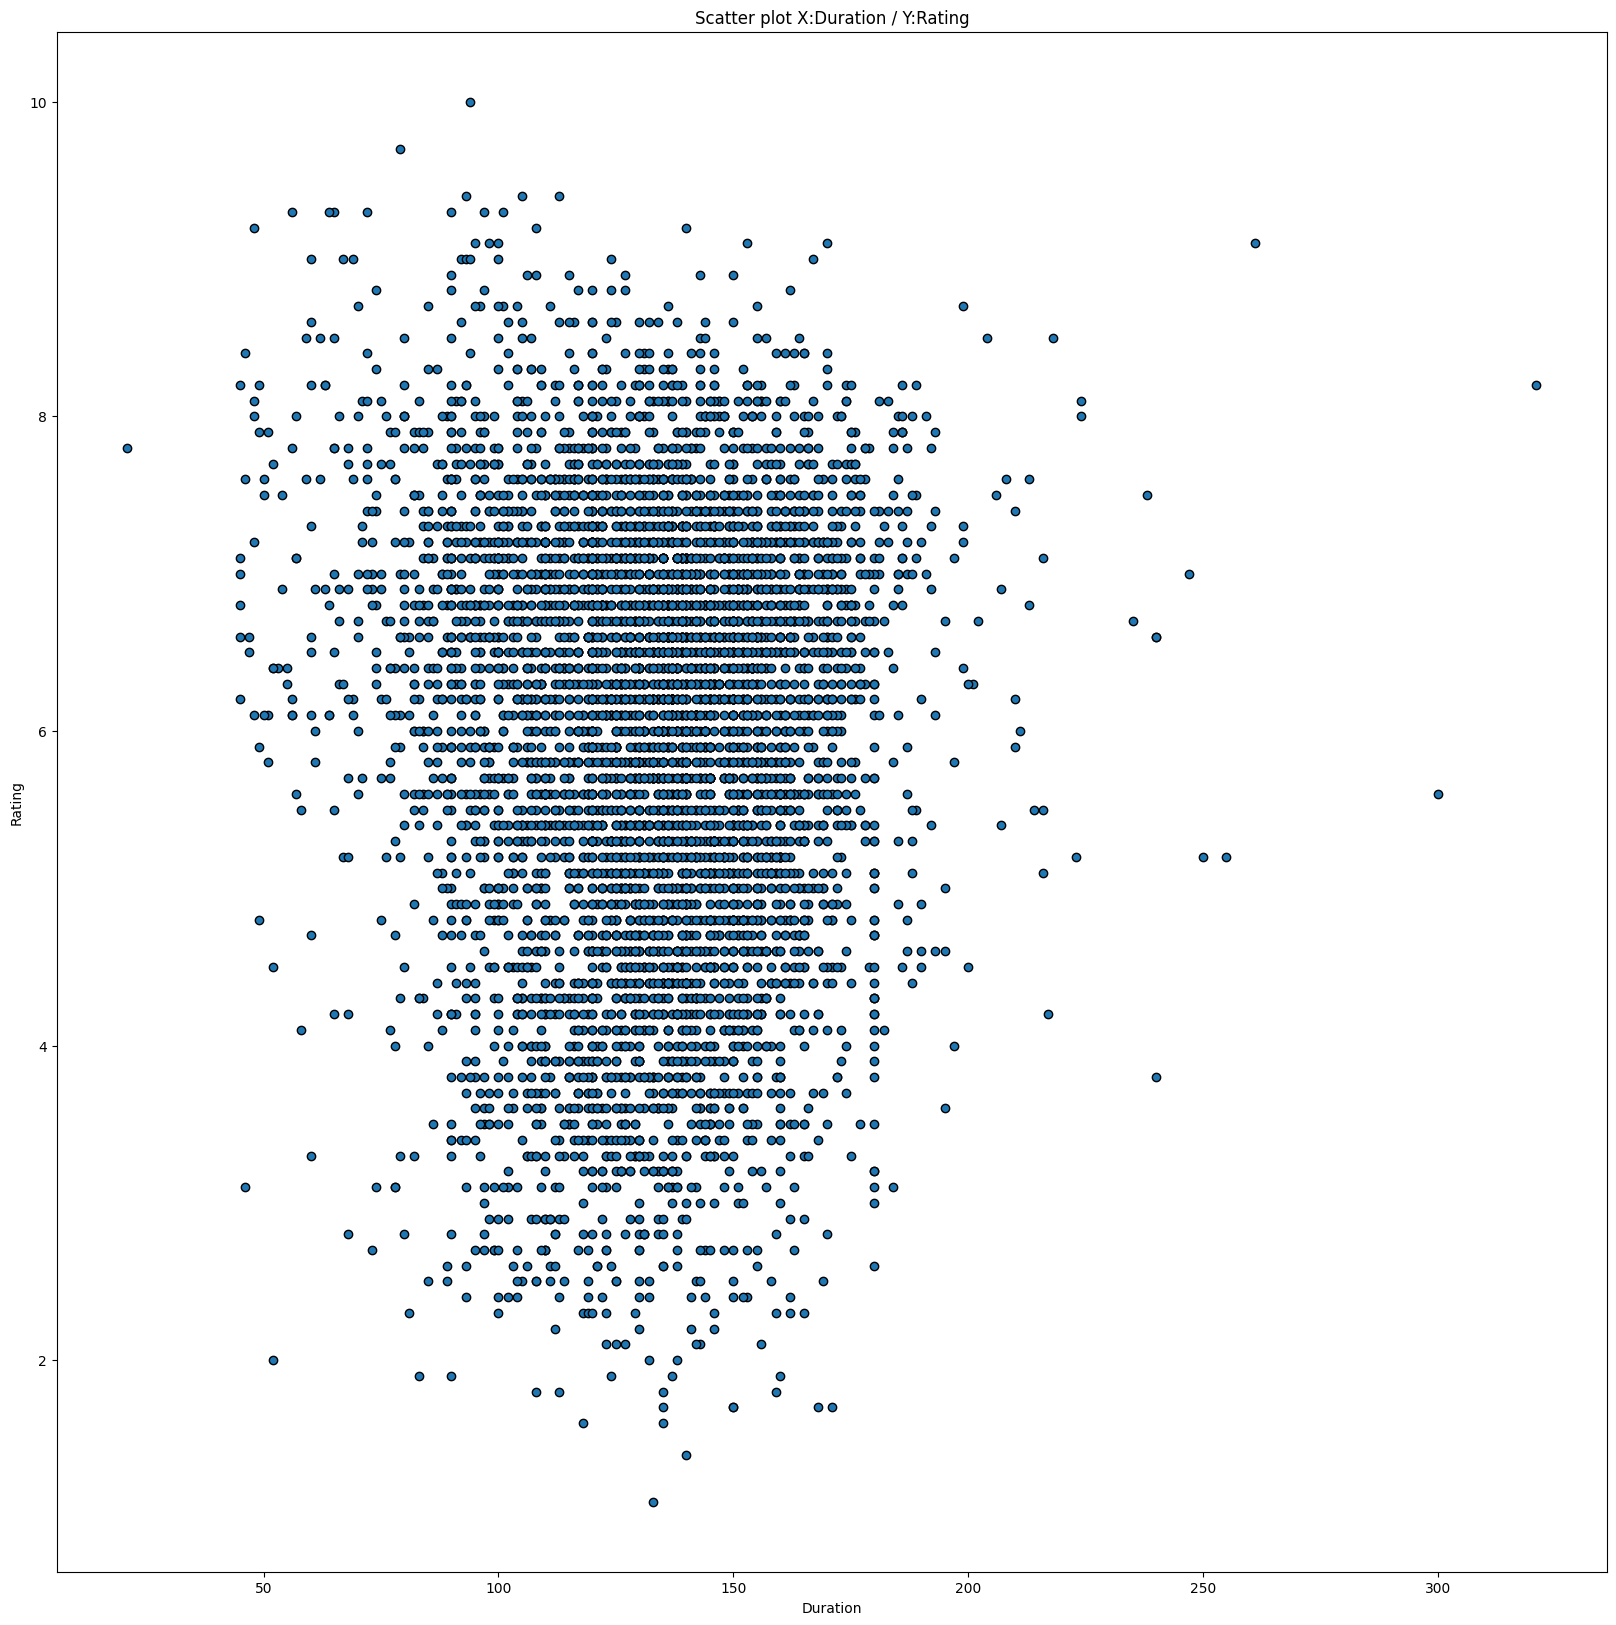

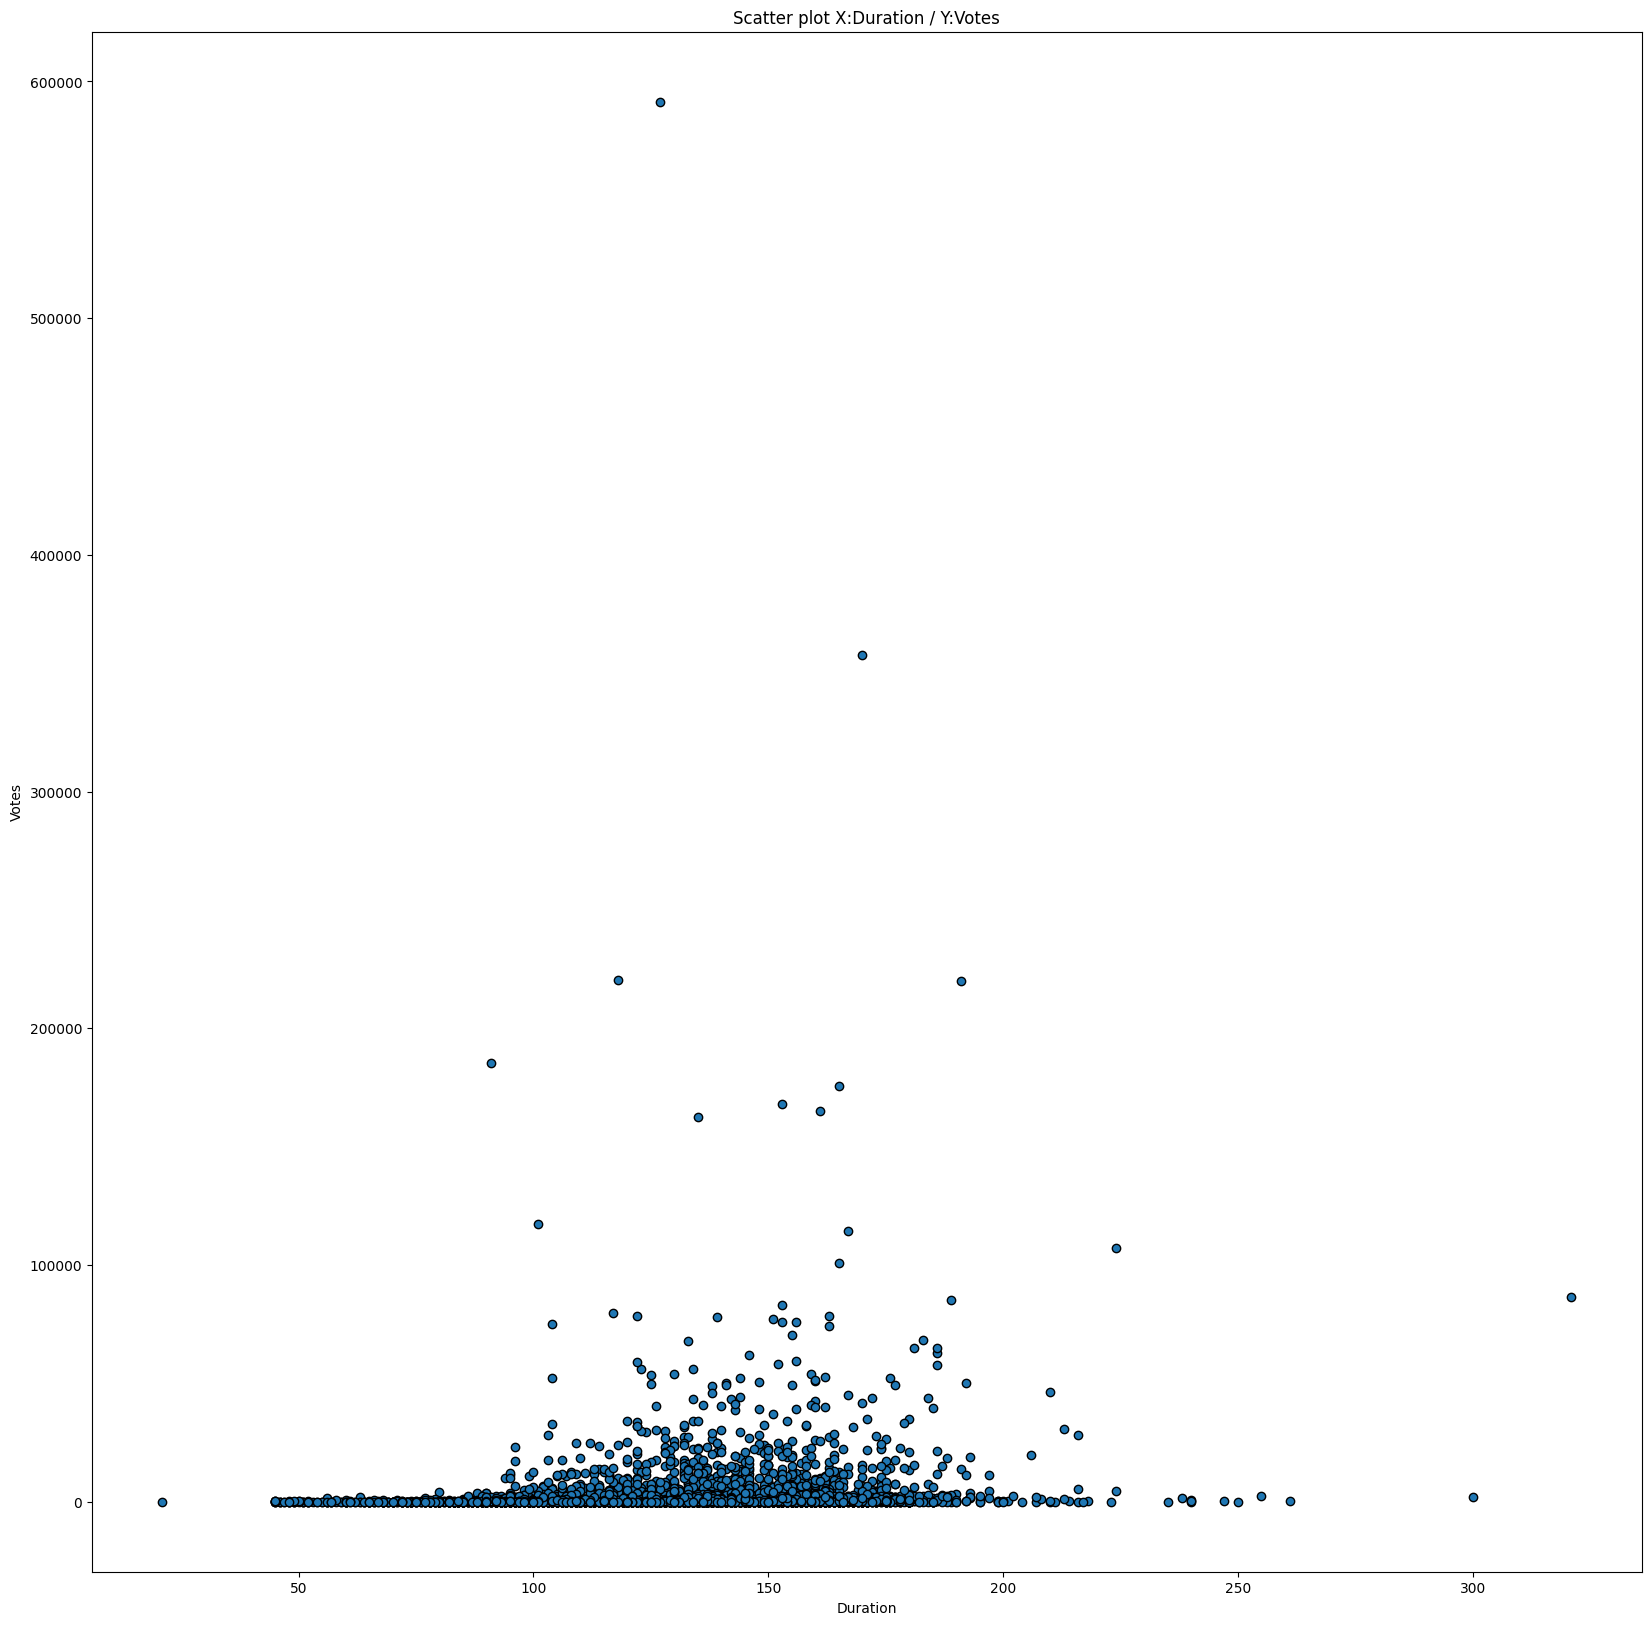

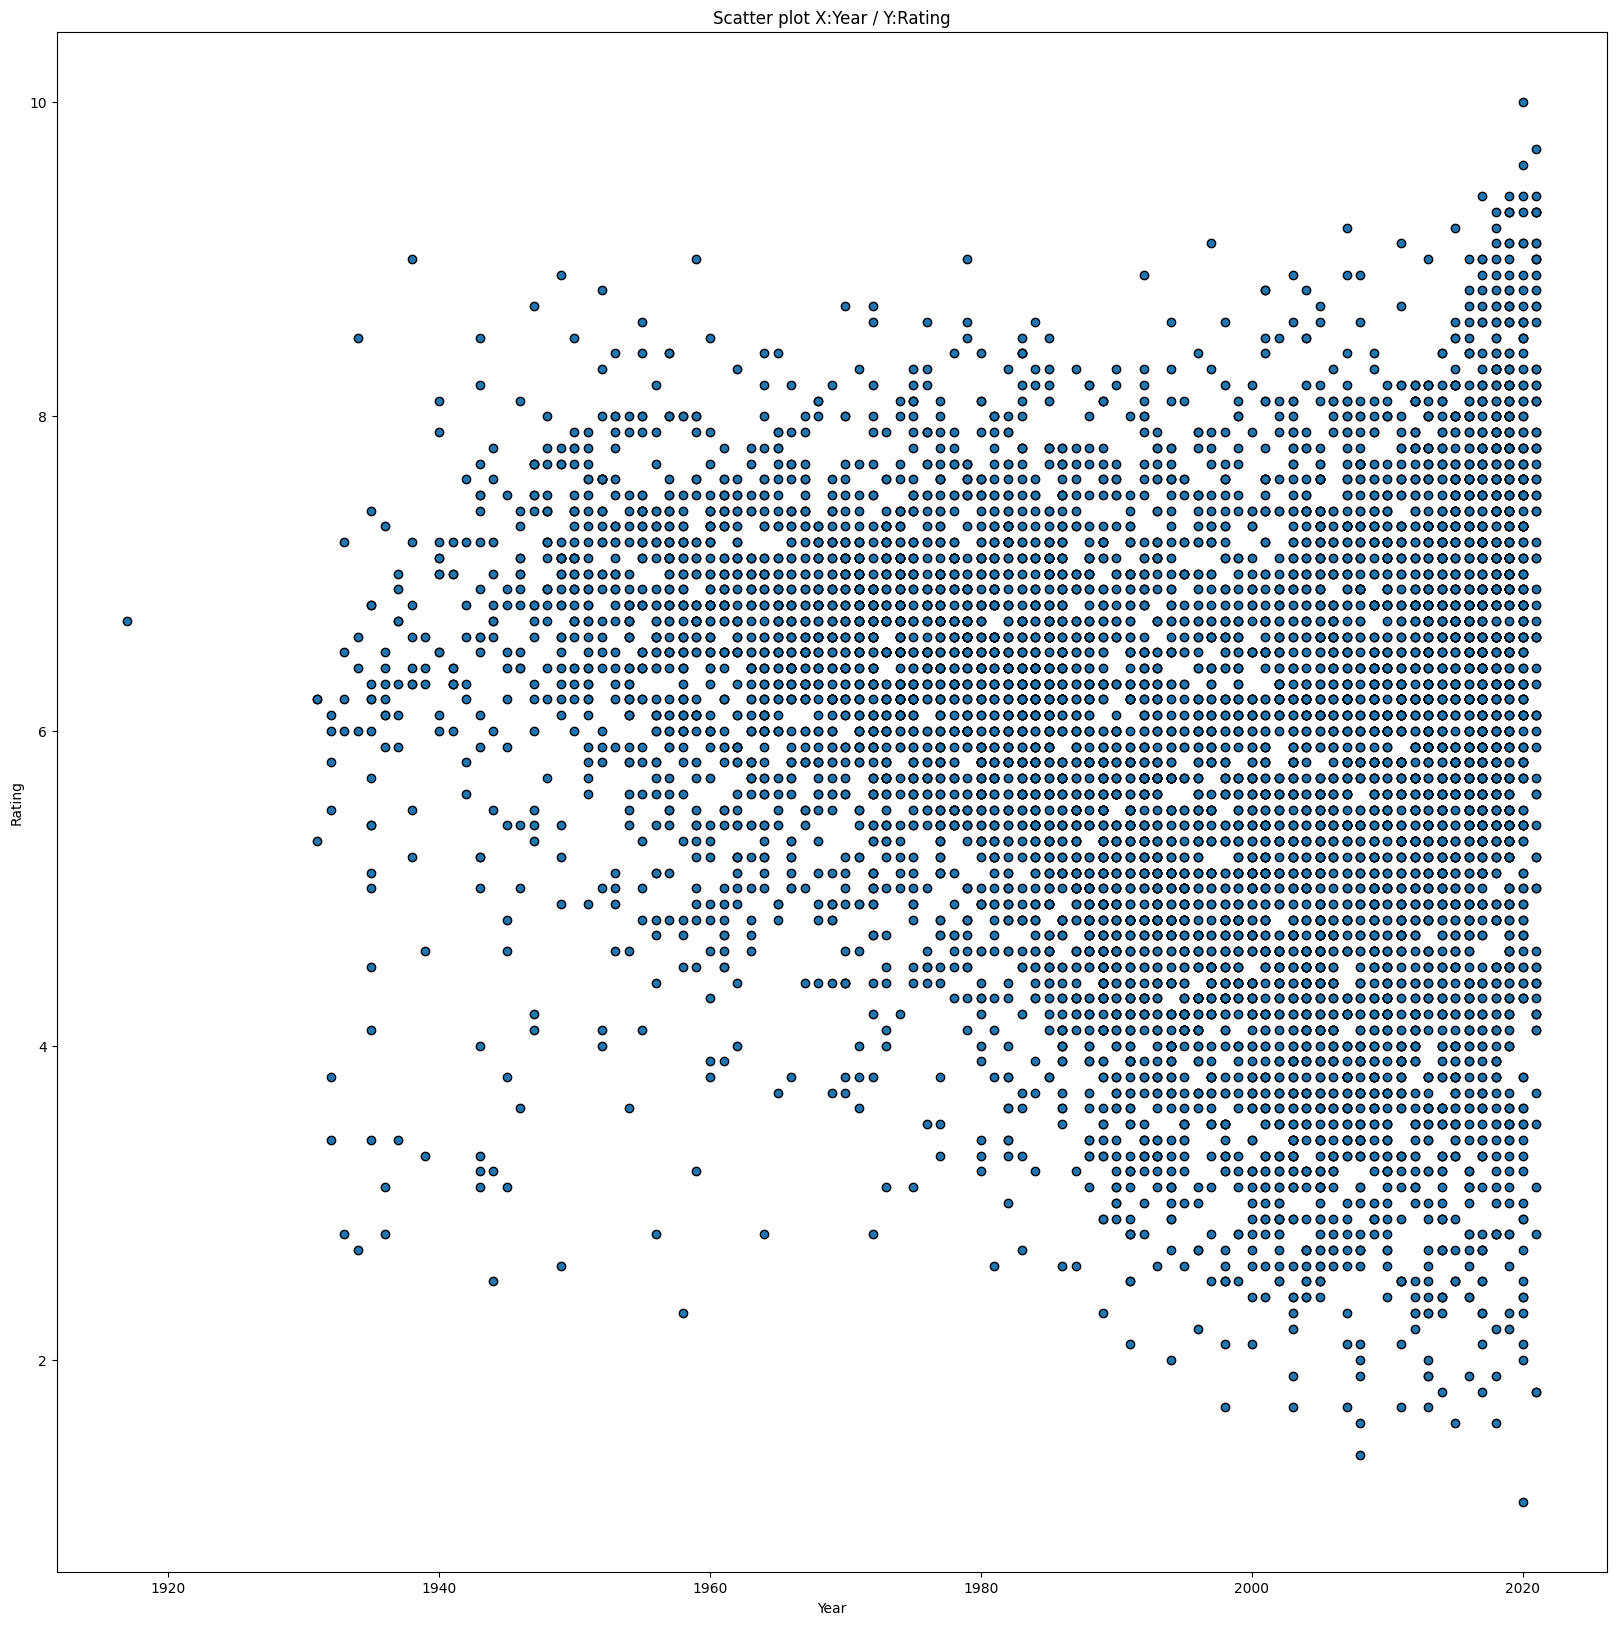

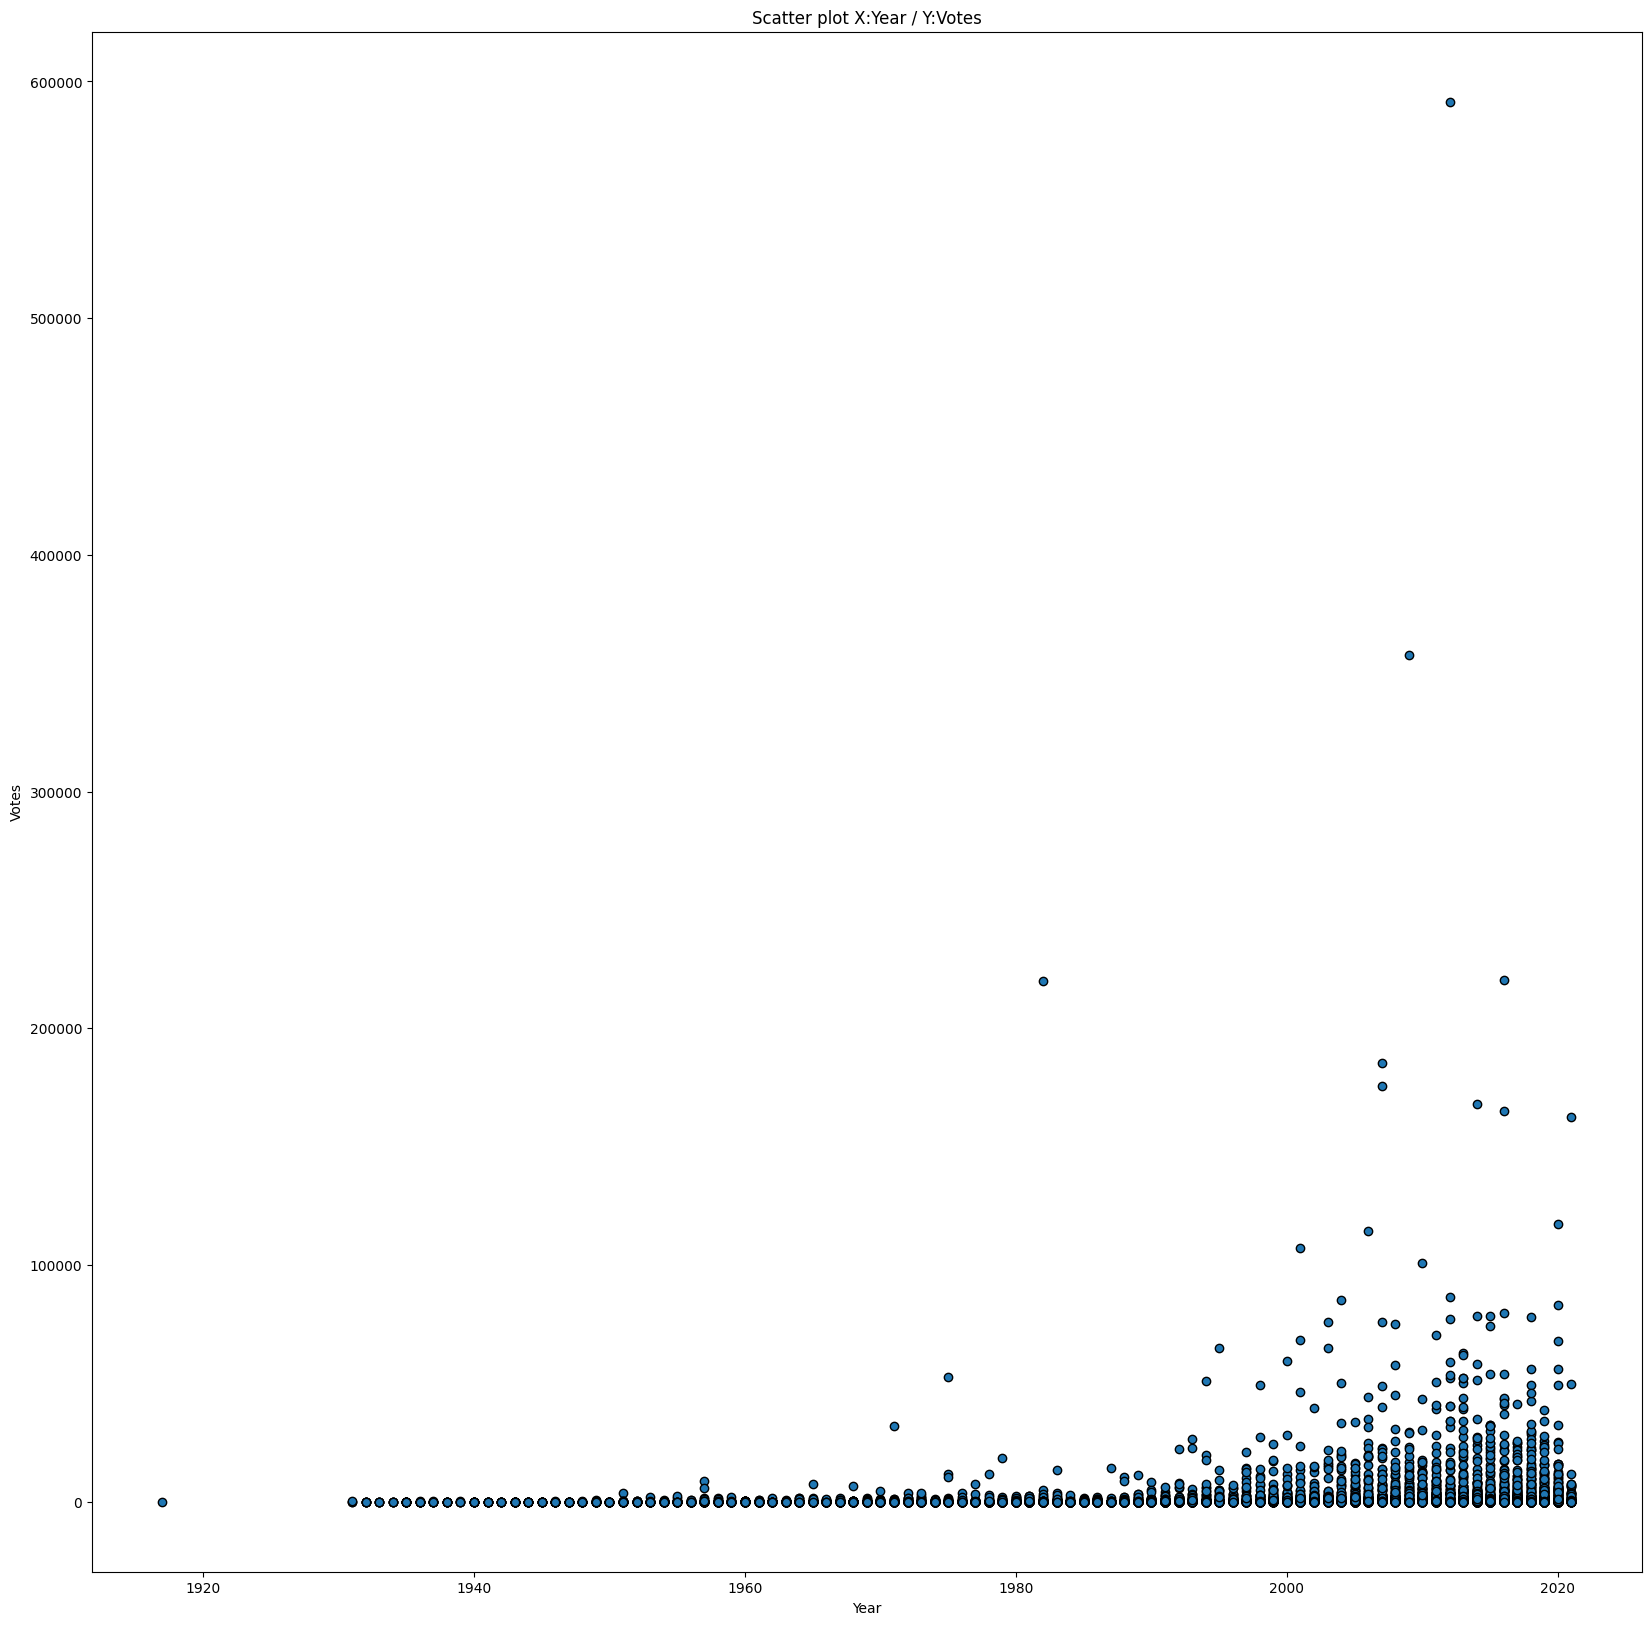

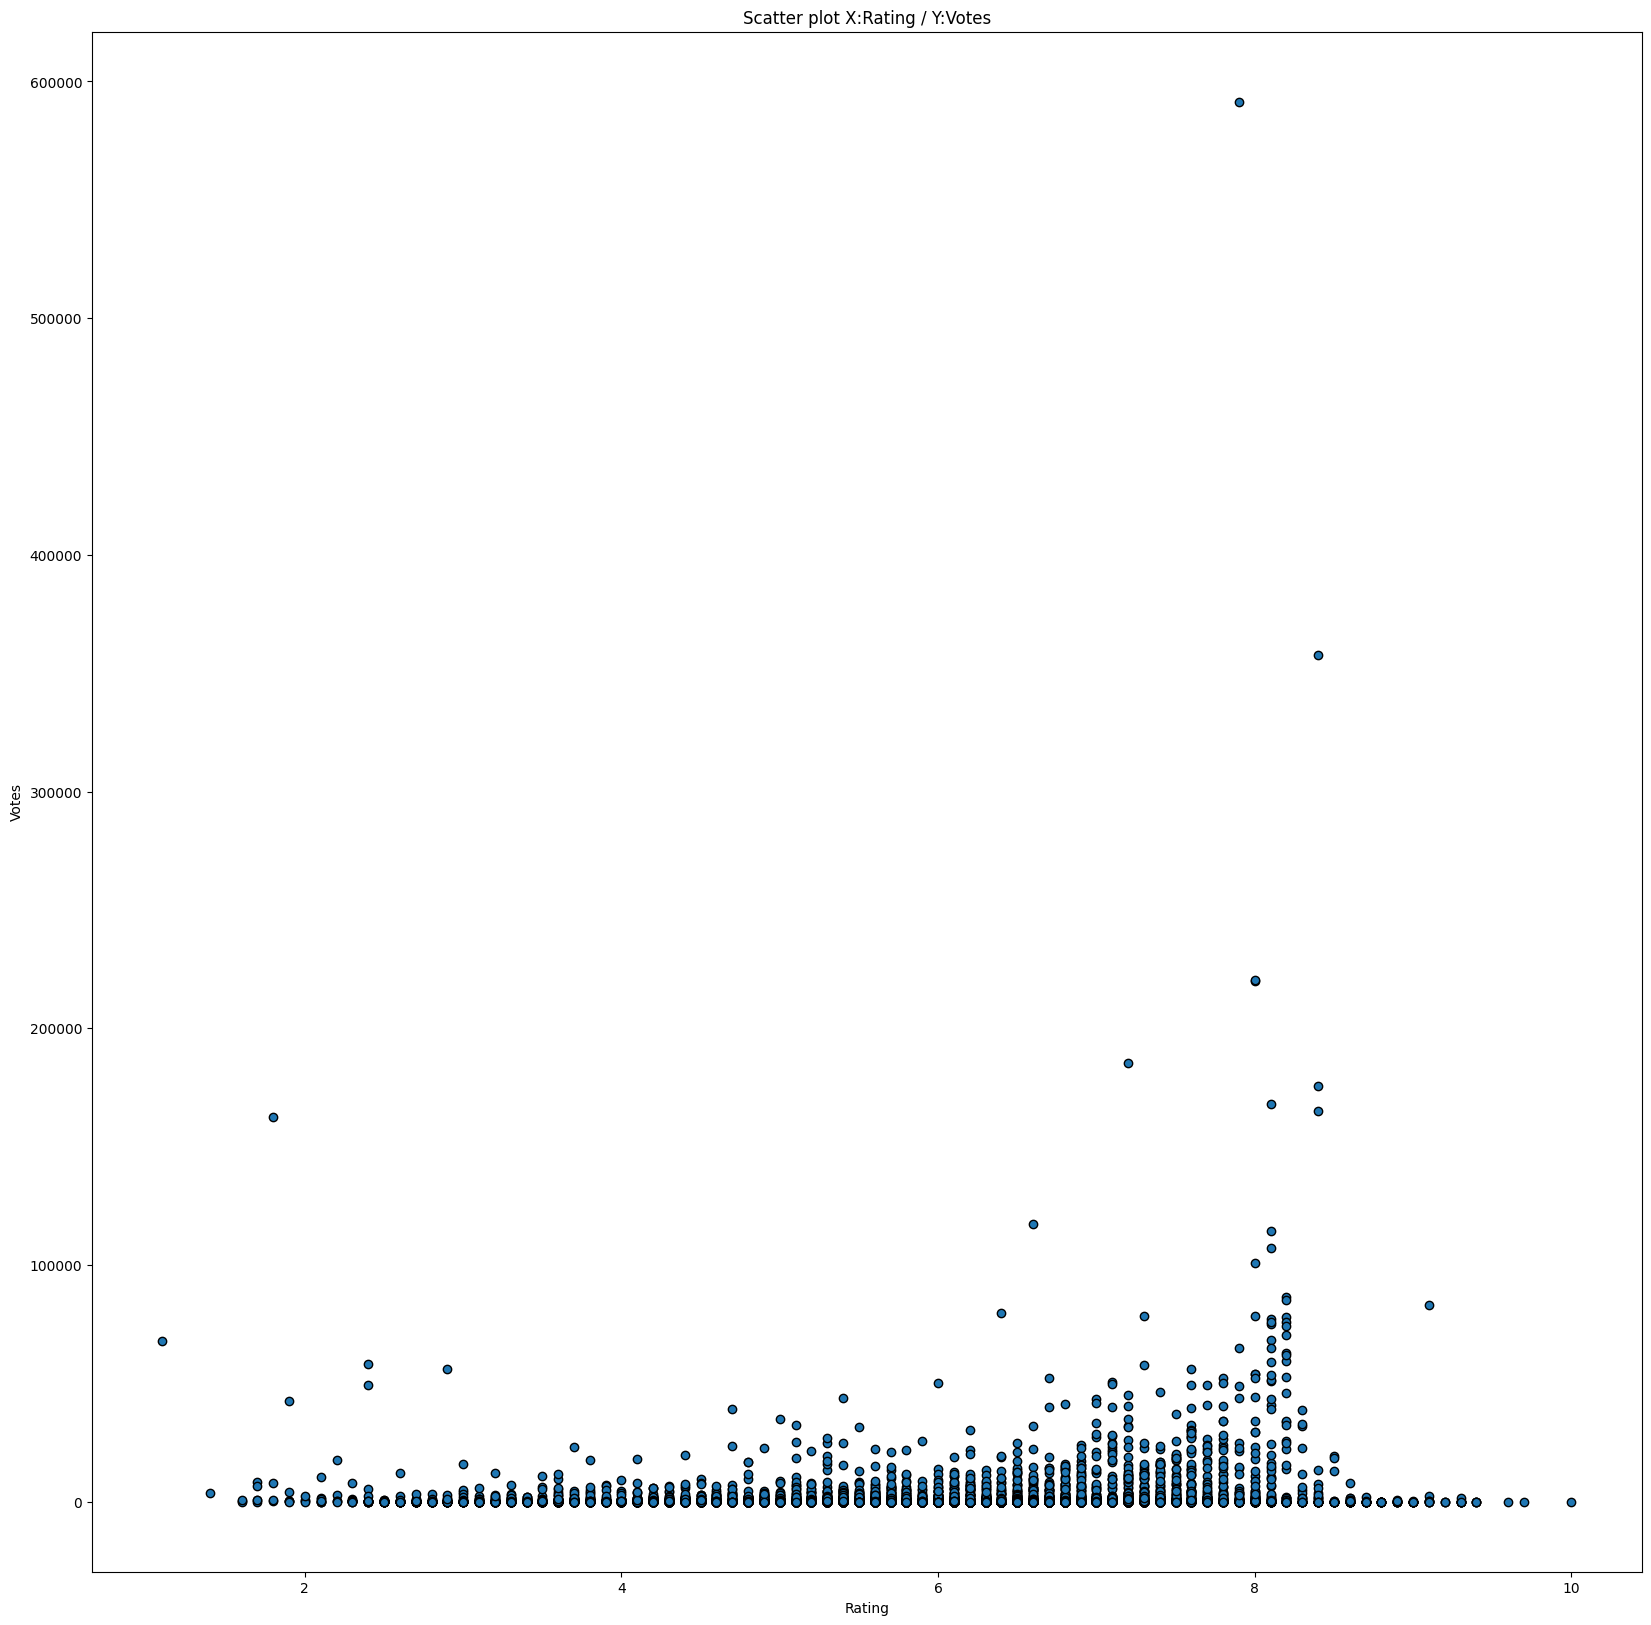

In [75]:
comb = combinations(["Duration", "Year", "Rating", "Votes"], 2)
comb_list = []
for i in list(comb):
    comb_list.append(list(i))
    
for col in comb_list:
    Scatterplot(col[0], col[1])

# Preprocessing of data

In [76]:
d.isnull().sum().sort_values(ascending = False) 

Duration    8269
Rating      7590
Votes       7590
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Director     525
Name          10
Year           0
dtype: int64

In [77]:
def missing (h):
    missing_number = h.isnull().sum().sort_values(ascending=False)
    missing_percent = (h.isnull().sum()/h.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(d)

,Missing_Number,Missing_Percent
Duration,8269,0.533174
Rating,7590,0.489393
Votes,7590,0.489393
Actor 3,3144,0.202721
Actor 2,2384,0.153717
Genre,1877,0.121027
Actor 1,1617,0.104262
Director,525,0.033851
Name,10,0.000645
Year,0,0.000000


<Axes: >

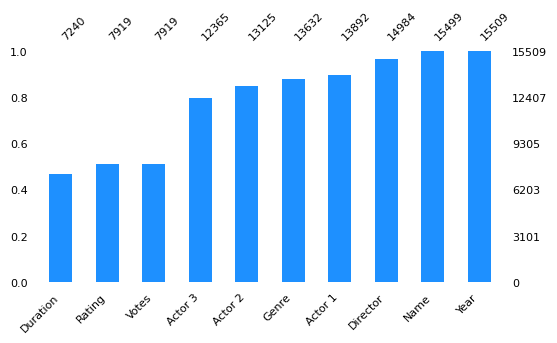

In [79]:
missingno.bar(d, color="dodgerblue", sort="ascending", figsize=(6,3), fontsize=8)

In [81]:
d.dropna(subset=['Rating'], inplace=True)

In [82]:
d.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [83]:
d['Duration'].fillna(d['Duration'].mean(), inplace=True)

In [84]:
d.isnull().sum().sort_values(ascending = False) 

Name        9
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [85]:
d.dtypes

Name         object
Year          int64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [86]:
d.shape

(7558, 10)

<Axes: >

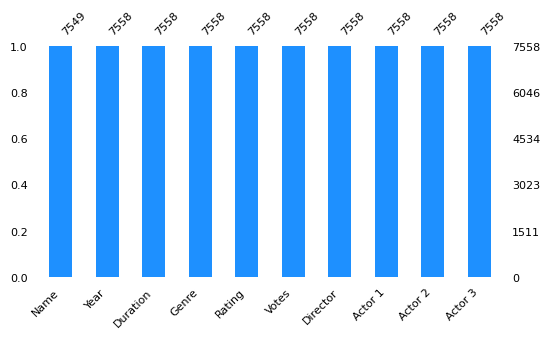

In [88]:
missingno.bar(d, color="dodgerblue", sort="ascending", figsize=(6,3), fontsize=8)

# Feature Engineering

In [89]:
d['Genre'] = d['Genre'].str.split(', ')
d = d.explode('Genre')
d['Genre'].fillna(d['Genre'].mode()[0], inplace=True)

In [91]:
d.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Musical,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142.0,Drama,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,Yahaan,2005,142.0,Romance,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,Yahaan,2005,142.0,War,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82.0,Horror,5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [92]:
actor1_encoding = d.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding = d.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding = d.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding = d.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding = d.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [93]:
d['actor1_encoded'] = round(d['Actor 1'].map(actor1_encoding['Rating']), 1)
d['actor2_encoded'] = round(d['Actor 2'].map(actor2_encoding['Rating']), 1)
d['actor3_encoded'] = round(d['Actor 3'].map(actor3_encoding['Rating']), 1)
d['director_encoded'] = round(d['Director'].map(director_encoding['Rating']), 1)
d['genre_encoded'] = round(d['Genre'].map(genre_encoding['Rating']), 1)

In [94]:
d.drop(['Name','Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [95]:
d.head(10)

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8.0,6.8,7.0,7.0,7.0,6.0
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,6.0
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,6.2
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,6.0
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,5.7
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,6.0
8,2012,82.0,5.6,326.0,5.6,5.8,5.6,5.6,4.8


In [103]:
# Plotting the top 5 actors, director, and genre
fig = go.Figure()
# Plotting top 5 actors
for actor_column in ['actor1_encoded', 'actor2_encoded', 'actor3_encoded']:
    top5_actors = d[['Year', actor_column]].sort_values(by=actor_column, ascending=False).head()
    fig.add_trace(go.Bar(x=top5_actors['Year'], y=top5_actors[actor_column],
                         name=actor_column, marker_color='red'))

# Plotting director
top_director = d[['Year', 'director_encoded']].sort_values(by='director_encoded', ascending=False).head()
fig.add_trace(go.Bar(x=top_director['Year'], y=top_director['director_encoded'],
                     name='director_encoded', marker_color='yellow'))

# Plotting genre
top_genre = d[['Year', 'genre_encoded']].sort_values(by='genre_encoded', ascending=False).head()
fig.add_trace(go.Bar(x=top_genre['Year'], y=top_genre['genre_encoded'],
                     name='genre_encoded', marker_color='green'))

# Customize layout
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Encoded Rating'),
    title=dict(text='Top 5 Actors, Directors, and Genres', font=dict(size=20)),
    font=dict(family="Arial, sans-serif", size=8, color="Black"),
    barmode='group'
)
fig.show()

<Axes: >

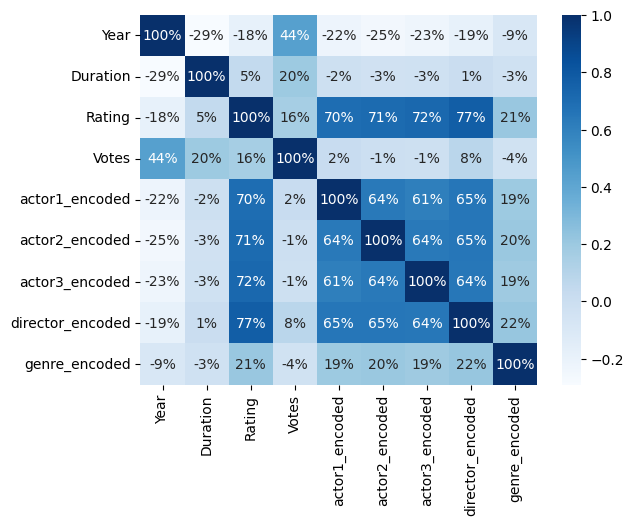

In [104]:
sns.heatmap(d.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')

In [105]:
X = d.drop(['Rating'], axis=1)
y = d['Rating']

In [106]:
d.head(10)

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8.0,6.8,7.0,7.0,7.0,6.0
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,6.0
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,6.2
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,6.0
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,5.7
6,2005,142.0,7.4,1086.0,5.3,5.8,6.7,7.5,6.0
8,2012,82.0,5.6,326.0,5.6,5.8,5.6,5.6,4.8


In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state= 22)  #Splitting train and test set

# Different implementation models

## linear regression

In [108]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [109]:
print('Mean Squared Error (Linear Regression - Test):',   mean_squared_error(y_test, lr_pred_test))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))

Mean Squared Error (Linear Regression - Test): 0.46439214619755637
Mean Absolute Error  (Linear Regression - Test):  0.5078404379088721
R2 score (Linear Regression - Train):  0.7504478189374881
R2 Score (Linear Regression - Test): 0.7386906025015387


## Random forest regressor

In [110]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rf_pred_train = rfg.predict(X_train)
rf_pred_test = rfg.predict(X_test)

In [111]:
print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, rf_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, rf_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,rf_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,rf_pred_test))

Mean Squared Error (Random Forest - Test): 0.0878762009102731
Mean Absolute Error  (Random Forest - Test):  0.1746677503250979
R2 score (Random Forest - Train):  0.9910454852272371
R2 Score (Random Forest - Test): 0.9505528306145199


## xgboost Regressor

In [112]:
# Create and train the XGBoost Regressor model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)

In [113]:
print('Mean Squared Error (xgboost - Test):', mean_squared_error(y_test, y_pred_xgboost_test))
print('Mean Absolute Error  (xgboost - Test): ',mean_absolute_error(y_test, y_pred_xgboost_test))
print('R2 score (xgboost - Train): ', r2_score(y_train, y_pred_xgboost_train))
print('R2 Score (xgboost - Test):', r2_score(y_test,y_pred_xgboost_test))

Mean Squared Error (xgboost - Test): 0.19402499513352767
Mean Absolute Error  (xgboost - Test):  0.30208498881294144
R2 score (xgboost - Train):  0.9484468140076008
R2 Score (xgboost - Test): 0.8908238328466141


## Decision Tree

In [114]:
dt = DecisionTreeRegressor(max_depth=9,random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [115]:
print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_test))

Mean Squared Error (Decision Tree - Test): 0.3832810391265005
Mean Absolute Error  (Decision Tree - Test):  0.42638652903511415
R2 score (Decision Tree - Train):  0.83019589638655
R2 Score (Decision Tree - Test): 0.784331112774411


# Prediction, Visualization, and Evaluation

In [116]:
# Evaluate Linear Regression
mae_lr_train = mean_absolute_error(y_train, lr_pred_train)
mae_lr_test = mean_absolute_error(y_test, lr_pred_test)
mse_lr_train = mean_squared_error(y_train, lr_pred_train)
mse_lr_test = mean_squared_error(y_test, lr_pred_test)

# Evaluate Random Forest Regressor
mae_rf_train = mean_absolute_error(y_train, rf_pred_train)
mae_rf_test = mean_absolute_error(y_test, rf_pred_test)
mse_rf_train = mean_squared_error(y_train, rf_pred_train)
mse_rf_test = mean_squared_error(y_test, rf_pred_test)

# Evaluate Random Forest Regressor
mae_dt_train = mean_absolute_error(y_train, y_pred)
mae_dt_test = mean_absolute_error(y_test, y_pred_test)
mse_dt_train = mean_squared_error(y_train, y_pred)
mse_dt_test = mean_squared_error(y_test, y_pred_test)

# Evaluate xgboost Regressor
mae_xg_train = mean_absolute_error(y_train, y_pred_xgboost_train)
mae_xg_test = mean_absolute_error(y_test, y_pred_xgboost_test)
mse_xg_train = mean_squared_error(y_train, y_pred_xgboost_train)
mse_xg_test = mean_squared_error(y_test, y_pred_xgboost_test)

In [117]:
# Create DataFrames for plotting
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'decision tree','xgboost Regressor'],
    'MAE Train': [mae_lr_train, mae_rf_train,mae_dt_train,mae_xg_train],
    'MAE Test': [mae_lr_test, mae_rf_test, mae_dt_test,mae_xg_test],
    'MSE Train': [mse_lr_train, mse_rf_train, mse_dt_train,mse_xg_train],
    'MSE Test': [mse_lr_test, mse_rf_test, mse_dt_test,mse_xg_test]
})

In [127]:
# Plotting MAE
fig_mae = px.bar(metrics_df, x='Model', y=['MAE Train', 'MAE Test'],
                 title='Mean Absolute Error (MAE)',
                 labels={'value': 'MAE', 'variable': 'Dataset'},
                 color_discrete_map={'MAE Train': 'DeepPink', 'MAE Test': 'yellow'})
fig_mae.update_layout(barmode='group')

# Show the plots
fig_mae.show()

In [119]:
# Plotting MSE
fig_mse = px.bar(metrics_df, x='Model', y=['MSE Train', 'MSE Test'],
                 title='Mean Squared Error (MSE)',
                 labels={'value': 'MSE', 'variable': 'Dataset'},
                 color_discrete_map={'MSE Train': 'blue', 'MSE Test': 'red'})
fig_mse.update_layout(barmode='group')

fig_mse.show()

# Evaluation of xgboost Regressor Model

In [120]:
scatter_color = 'skyblue'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=y_pred_xgboost_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training xgboost Regressor Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=y_pred_xgboost_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing xgboost Regressor Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

# Evaluation of Random Forest Model

In [125]:
scatter_color = 'yellow'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=rf_pred_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training Random Forest Regressor Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=rf_pred_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing Random Forest Regressor Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

In [129]:
# Create a prediction dataframe by Random Forest Regressor Model
prediction_Random_Forest_Regressor  = pd.DataFrame({'actual_rating': y_test,
                        'predicted_rating': rf_pred_test.ravel(),
                        'residual': y_test - rf_pred_test}
                      )
prediction_Random_Forest_Regressor.head(10)

,actual_rating,predicted_rating,residual
9475,7.0,6.881,0.119
12851,6.1,6.451,-0.351
10801,6.8,6.555,0.245
5268,2.4,2.470,-0.070
7527,5.7,5.720,-0.020
8057,6.3,6.275,0.025
13436,6.3,6.288,0.012
10518,5.4,5.259,0.141
3429,5.6,5.539,0.061
6843,6.1,6.229,-0.129
